In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\RAJESH\OneDrive\Churn_Modelling.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df[df.duplicated()]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [6]:
label_encoder= LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df = pd.get_dummies(df,columns=["Geography"],drop_first=True)

In [7]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42       2   
1          2    15647311      Hill          608       0   41       1   
2          3    15619304      Onio          502       0   42       8   
3          4    15701354      Boni          699       0   39       1   
4          5    15737888  Mitchell          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1              False            False  
1       0              False             True  
2       1              False            False  
3       0              False            False  
4       0              False             True

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [31]:
features = ['CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Geography_Germany', 'Geography_Spain']

In [32]:
X =  df[features]
y = df["Exited"]


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

In [34]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train[:5] ,X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.50857963,
         -0.57946723, -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 , -0.50857963,
          1.72572313, -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688,  1.96626042,
         -0.57946723,  1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272,  1.96626042,
         -0.57946723, -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019,  1.96626042,
         -0.57946723, -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
    

In [35]:
model = RandomForestClassifier(n_estimators=100 , random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test)

In [37]:
conf_matrix= confusion_matrix(y_test,y_pred)
class_report =  classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

In [38]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


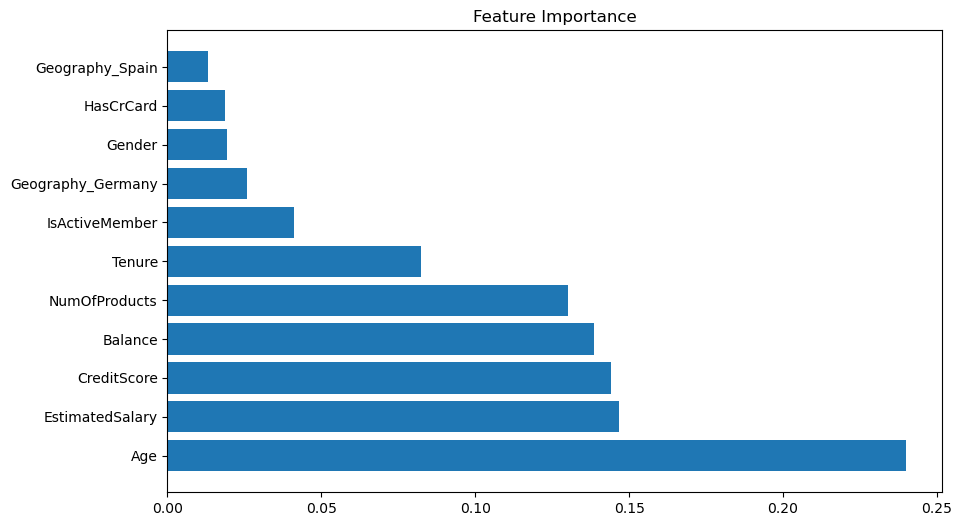

In [39]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
    
conf_matrix_log_reg = confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg =classification_report(y_test,y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test,y_pred_log_reg)
print(conf_matrix_log_reg ,class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [45]:
from sklearn.svm import SVC
#Build and train SVM model
svm_model = SVC(kernel="linear" , random_state=42)
svm_model.fit(X_train,y_train)
# make predictions
y_pred_svm = model.predict(X_test)

# evaluate the model
conf_matrix_svm = confusion_matrix(y_test,y_pred_svm)
class_report_svm =classification_report(y_test,y_pred_svm)
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(conf_matrix_svm ,class_report_svm, accuracy_svm)

[[1551   56]
 [ 211  182]]               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000
 0.8665


In [ ]:
# program to set zero division to avoid the warning
# from sklearn.metrics import precision_score
# precision = precision_score(y_true, y_pred, average="macro", zero_division=0)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
#Build and train KNN model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

# make predictions
y_pred_knn = model.predict(X_test)

# evaluate the model
conf_matrix_knn = confusion_matrix(y_test,y_pred_knn)
class_report_knn =classification_report(y_test,y_pred_knn)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(conf_matrix_knn ,class_report_knn, accuracy_knn)

[[1551   56]
 [ 211  182]]               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000
 0.8665


In [52]:
from sklearn.ensemble import GradientBoostingClassifier
#Build and train  model Gradietn boosting model

gbm_model = GradientBoostingClassifier(n_estimators=5,random_state=42)
gbm_model.fit(X_train,y_train)

# make predictions
y_pred_gbm = model.predict(X_test)

# evaluate the model
conf_matrix_gbm = confusion_matrix(y_test,y_pred_gbm)
class_report_gbm =classification_report(y_test,y_pred_gbm)
accuracy_gbm = accuracy_score(y_test,y_pred_gbm)
print(conf_matrix_gbm ,class_report_gbm, accuracy_gbm)

[[1551   56]
 [ 211  182]]               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000
 0.8665
